In [ ]:
!wget https://storage.googleapis.com/learning-datasets/rps.zip
!wget https://storage.googleapis.com/learning-datasets/rps-test-set.zip

--2024-07-02 10:25:19--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.207, 173.194.210.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  63.4MB/s    in 3.0s    

2024-07-02 10:25:22 (63.4 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-07-02 10:25:22--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.207, 173.194.210.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    

In [ ]:
train_dir = "/content/rps/train/"
test_dir = "/content/rps/"

In [ ]:
import zipfile


Z1 = zipfile.ZipFile("/content/rps.zip","r")
Z1.extractall(train_dir)
Z1.close()

In [ ]:
Z2 = zipfile.ZipFile("/content/rps-test-set.zip","r")
Z2.extractall(test_dir)
Z2.close()

In [18]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3

In [ ]:
train_gen = ImageDataGenerator(
  rescale = 1/255 ,
  rotation_range=40,
  width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
horizontal_flip=True,
fill_mode="nearest",
zoom_range=0.2

)

test_gen = ImageDataGenerator(
  rescale = 1/255 ,
  rotation_range=40,
  width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
horizontal_flip=True,
fill_mode="nearest",
zoom_range=0.2

)

In [ ]:
train_data = train_gen.flow_from_directory(
train_dir+"rps",
target_size=(150,150),
class_mode="categorical"

)

test_data = test_gen.flow_from_directory(
test_dir+"rps-test-set",
target_size=(150,150),
class_mode="categorical"

)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = Sequential([
Conv2D(16,(3,3),activation="relu", input_shape=(150,150,3)),
MaxPooling2D(2,2),
Conv2D(16,(3,3),activation="relu"),
MaxPooling2D(2,2),
Conv2D(32,(3,3),activation="relu"),
MaxPooling2D(2,2),

Conv2D(32,(3,3),activation="relu"),
MaxPooling2D(2,2),
Conv2D(64,(3,3),activation="relu"),
MaxPooling2D(2,2),
Flatten(),
Dense(512,activation="relu"),
Dense(3,activation="softmax")


])

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history= model.fit(train_data,epochs=10)

Epoch 1/10
79/79 [==============================] - 58s 718ms/step - loss: 1.0380 - accuracy: 0.4357
Epoch 2/10
79/79 [==============================] - 58s 735ms/step - loss: 0.6703 - accuracy: 0.7071
Epoch 3/10
79/79 [==============================] - 56s 704ms/step - loss: 0.4602 - accuracy: 0.8175
Epoch 4/10
79/79 [==============================] - 55s 697ms/step - loss: 0.3165 - accuracy: 0.8770
Epoch 5/10
79/79 [==============================] - 56s 711ms/step - loss: 0.2563 - accuracy: 0.8976
Epoch 6/10
79/79 [==============================] - 57s 724ms/step - loss: 0.2143 - accuracy: 0.9242
Epoch 7/10
79/79 [==============================] - 56s 703ms/step - loss: 0.1487 - accuracy: 0.9472
Epoch 8/10
79/79 [==============================] - 56s 701ms/step - loss: 0.1526 - accuracy: 0.9389
Epoch 9/10
79/79 [==============================] - 55s 699ms/step - loss: 0.1623 - accuracy: 0.9425
Epoch 10/10
79/79 [==============================] - 57s 719ms/step - loss: 0.1172 - accura

In [ ]:
model.evaluate(test_data)

12/12 [==============================] - 6s 441ms/step - loss: 0.2230 - accuracy: 0.9194


[0.22303593158721924, 0.9193548560142517]

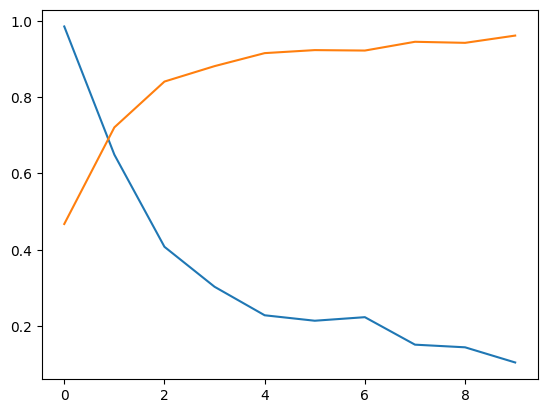

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

In [19]:
tm = InceptionV3(input_shape=(150,150,3),
   include_top=False,
    weights="imagenet"
    )

87910968/87910968 [==============================] - 1s 0us/step


In [20]:
tm.trainable = False

In [21]:
model2 = Sequential([
       tm,
       Flatten(),
       Dense(3,activation="softmax")

])

In [22]:
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [23]:
model2.fit(train_data,epochs=5)

Epoch 1/5
79/79 [==============================] - 126s 2s/step - loss: 0.6437 - accuracy: 0.8655
Epoch 2/5
79/79 [==============================] - 117s 1s/step - loss: 0.1320 - accuracy: 0.9567
Epoch 3/5
79/79 [==============================] - 117s 1s/step - loss: 0.1194 - accuracy: 0.9647
Epoch 4/5
79/79 [==============================] - 116s 1s/step - loss: 0.1087 - accuracy: 0.9675
Epoch 5/5
79/79 [==============================] - 117s 1s/step - loss: 0.1838 - accuracy: 0.9552


In [24]:
model2.evaluate(test_data)

12/12 [==============================] - 18s 1s/step - loss: 0.3130 - accuracy: 0.9167


[0.3129776418209076, 0.9166666865348816]